In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATASET: https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann

In [168]:
df = pd.read_csv('Part 1 - Artificial Neural Networks/Churn_Modelling.csv')

In [169]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [171]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

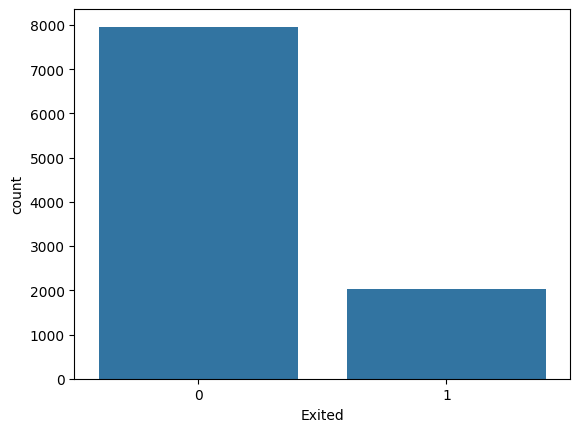

In [172]:
sns.countplot(data=df, x='Exited')

In [173]:
df = df.drop("RowNumber", axis=1)

In [174]:
len(df['CustomerId'].unique())

10000

In [175]:
df = df.drop(['Surname','CustomerId'], axis=1)

In [176]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [177]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: >

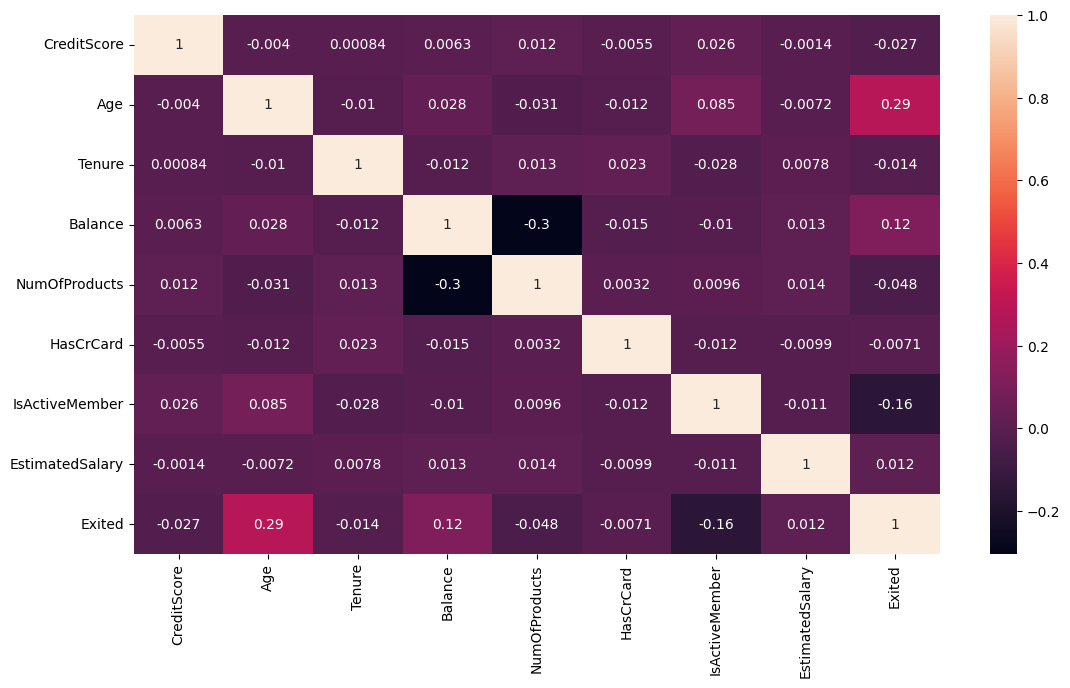

In [178]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='Exited', ylabel='Age'>

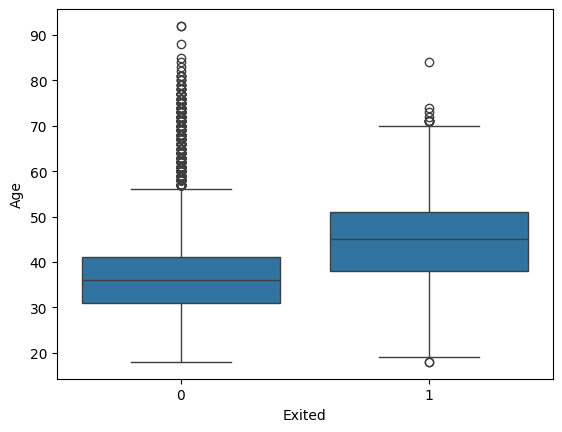

In [179]:
sns.boxplot(data=df, x="Exited", y='Age')

In [180]:
# help(sns.boxplot)

In [181]:
dummies = pd.get_dummies(df['Geography'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['Geography'], axis=1)

In [182]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [183]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [184]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [185]:
dummies1 = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, dummies1], axis=1)
df = df.drop(['Gender'], axis=1)

In [186]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [187]:
df['Tenure'].value_counts().sort_index()

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: count, dtype: int64

In [188]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [189]:
# help(train_test_split)

In [190]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [192]:
scaler = MinMaxScaler()

In [193]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
model = Sequential()

In [195]:
model.add(Dense(units=80, activation='relu'))
model.add(Dropout(rate=0.2))


model.add(Dense(units=40, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=20, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [196]:
model.fit(x=X_train, y=y_train, epochs=70, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5895 - val_loss: 0.5012
Epoch 2/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5066 - val_loss: 0.4769
Epoch 3/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4806 - val_loss: 0.4661
Epoch 4/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4788 - val_loss: 0.4609
Epoch 5/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4690 - val_loss: 0.4563
Epoch 6/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4621 - val_loss: 0.4507
Epoch 7/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4585 - val_loss: 0.4466
Epoch 8/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4598 - val_loss: 0.4414
Epoch 9/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4597 - val_loss: 0.4346
Epoch 10/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4519 - val_loss: 0.4282
Epoch 11/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4375 - val_loss: 0.4210
Epoch 12/70
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4347 - val_lo

In [197]:
model.history.history

{'loss': [0.5496342778205872,
  0.496953547000885,
  0.4818369448184967,
  0.4749295115470886,
  0.46541503071784973,
  0.4625810980796814,
  0.4601309895515442,
  0.4546986222267151,
  0.4513978958129883,
  0.44901856780052185,
  0.4422188401222229,
  0.4352595806121826,
  0.4221944808959961,
  0.4176090359687805,
  0.41246354579925537,
  0.40629860758781433,
  0.40310439467430115,
  0.39839720726013184,
  0.38327255845069885,
  0.3850192129611969,
  0.38191500306129456,
  0.3801428973674774,
  0.3764614462852478,
  0.3714004158973694,
  0.3702986240386963,
  0.36824437975883484,
  0.36795908212661743,
  0.36531949043273926,
  0.36624911427497864,
  0.36135175824165344,
  0.3649844825267792,
  0.360700786113739,
  0.3622441291809082,
  0.35917383432388306,
  0.36079141497612,
  0.3586291968822479,
  0.35737743973731995,
  0.35548096895217896,
  0.353518545627594,
  0.35537010431289673,
  0.35614320635795593,
  0.3531435430049896,
  0.35308465361595154,
  0.35271844267845154,
  0.35479

<Axes: >

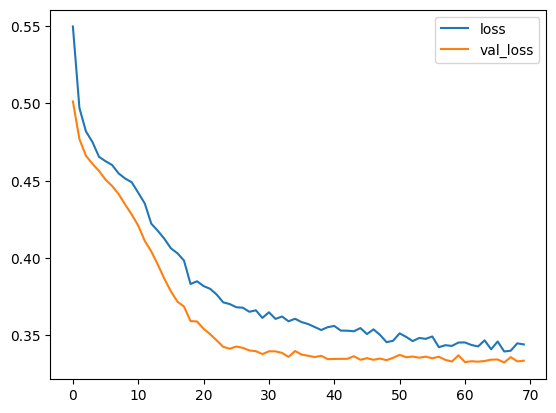

In [198]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [200]:
preds = (model.predict(X_test) > 0.5).astype('int32')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step


In [199]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [201]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1742
           1       0.47      0.77      0.58       258

    accuracy                           0.86      2000
   macro avg       0.72      0.82      0.75      2000
weighted avg       0.90      0.86      0.87      2000



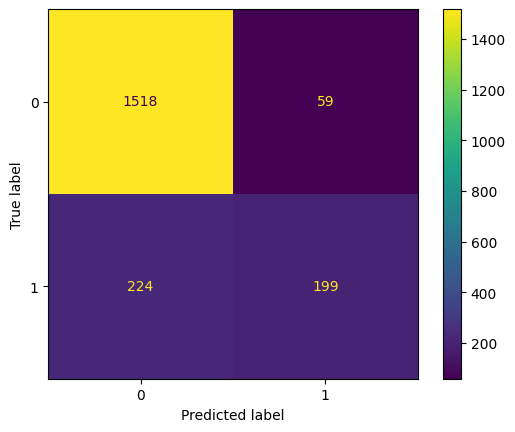

In [204]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test,preds))
cm.plot()

In [206]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('Exited',axis=1).iloc[random_ind]
new_customer

CreditScore           540
Age                    40
Tenure                  8
Balance               0.0
NumOfProducts           2
HasCrCard               1
IsActiveMember          0
EstimatedSalary    3560.0
Germany             False
Spain                True
Male                False
Name: 9521, dtype: object

In [207]:
len(new_customer)

11

In [208]:
new_customer = new_customer.values.astype(np.float32).reshape(1, 11)

In [209]:
model.predict(new_customer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[1.]], dtype=float32)

In [213]:
test1 = df.iloc[500] #0

In [216]:
test1_data = test1.drop('Exited').to_frame().T


scaled_data = scaler.transform(test1_data)
print((model.predict(scaled_data) > 0.5).astype('int32'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0]]
